## **Beta Binomial Model**

In [ ]:
###################
## Install rstan
##################

install.packages('rstan')
options(repr.plot.width  = 3,
        repr.plot.height = 3)
Sys.setenv(USE_CXX14 = 1)
library("rstan") # observe startup messages
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## **Implementation of beta-binomial with stan**

MLE =  0.3 
Posterior mean =  0.33  Exact result 
Postrior Analysis with Numerical Simulation 


[1] 0.32

[1] 0.12

2.5% 97.5% 
 0.10  0.54

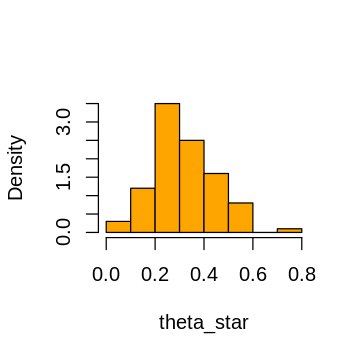

In [ ]:
## Data
y = c(1, 1, 0, 0, 0, 0, 0, 0, 0, 1)
N = length(y)

## maximum likelihood estimate
mle <- sum(y)/N
cat('MLE = ',mle,"\n")

## posterior mean under Beta(1,1) prior
a <-1
b <-1
post_mean <- (sum(y)+a)/(N+a+b)  

cat('Posterior mean = ',round(post_mean,2), ' Exact result',"\n")

## Posterior analysis simulating from posterior distribution
cat('Postrior Analysis with Numerical Simulation',"\n")
S <-sum(y)
sim.size<-100
theta_star<- rbeta(sim.size,S+a,N-S+b)
round(mean(theta_star),2)
## standard deviation
round(sd(theta_star),2)
## 95% Confidence interval
round(quantile(theta_star,probs = c(0.025,0.975)),2)
hist(theta_star,probability = T,col="orange",main="")

- This is analytical solution of $\theta$ under Beta($\alpha=1$,$\beta=1$) prior.

- Now we are going to implement the numerical solution for $\theta$ under Beta($\alpha=1$,$\beta=1$) prior using the Stan.

- First we write the Stan code for beta-binomial model

In [ ]:
## Stan code for beta binomial model
beta_binomial_stan <- "data {
                        int<lower=0> N;                  // N >= 0
                        int<lower=0,upper=1> y[N];       // y[n] in { 0, 1 }
                       }

                       parameters {
                          real<lower=0,upper=1> theta;         // theta in [0, 1]
                       }

                      model {
                        theta ~ beta(1,1);               // prior
                        y ~ bernoulli(theta);            // likelihood
                      }"


- Define all known part of the model as list and it will go as data in the model

Inference for Stan model: example.
2 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=2000.

       mean se_mean   sd   2.5%   25%   50%   75% 97.5% n_eff Rhat
theta  0.33    0.00 0.13   0.11  0.23  0.32  0.41  0.60   788    1
lp__  -8.14    0.03 0.73 -10.25 -8.28 -7.87 -7.69 -7.64   747    1

Samples were drawn using NUTS(diag_e) at Mon Feb  3 04:12:15 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



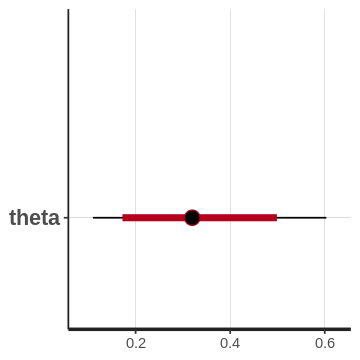

In [ ]:
## Data
dat <- list(N = N, y = y);

fit <- stan(model_code = beta_binomial_stan
            , model_name = "example"
            , data = dat
            , iter = 2000
            , chains = 2
            , verbose = FALSE
            , refresh = -1)
print(fit)

plot(fit)